In [1]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import hamming
from matplotlib import pyplot as plt
import numpy as np
import copy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("1000Mvla01.csv")
df.shape

(1000, 51)

In [3]:
df.columns = ['cout'] + [i for i in range(1, 51)]
df.index = ["v" + str(i) for i in range(1000)]


In [4]:
df.head()

cout   1   2  3   4  5  6  7  8  9  ...  41  42  43  44  45  46  47  48  \
v0  1117   1   4  7   2  4  7  3  9  1  ...   3  10   4  10   6   3   5   3   
v1  1228   5   4  2   6  6  5  2  6  3  ...   5   9   8   8   3   3   3   2   
v2   887  10   3  7   2  8  1  2  8  6  ...   4   9  10   5   7   6   3   3   
v3  1197   6   7  5   1  3  9  5  7  8  ...   2   5   2   2   6   6   4   2   
v4  1190   3  10  6  10  5  5  3  9  9  ...   3   9   3   9   2   8   8   2   

    49  50  
v0   5  10  
v1   1   1  
v2   9   5  
v3   1   6  
v4   2   2  

[5 rows x 51 columns]

In [5]:
df1 = df.T
df1

v0    v1   v2    v3    v4    v5    v6   v7    v8    v9  ...  v990  \
cout  1117  1228  887  1197  1190  1077  1128  975  1287  1281  ...  1339   
1        1     5   10     6     3     7     4    4     3     8  ...     7   
2        4     4    3     7    10     9     7    1    10     8  ...    10   
3        7     2    7     5     6     2    10    1     6     2  ...     5   
4        2     6    2     1    10     1     1    5     6     9  ...     9   
5        4     6    8     3     5     3     4   10     1     2  ...     2   
6        7     5    1     9     5     7     5    7     3     8  ...     4   
7        3     2    2     5     3     9     7    1     1     5  ...     5   
8        9     6    8     7     9     3     4    6     4     6  ...     3   
9        1     3    6     8     9     9     5    6     4     6  ...     4   
10       9     8    4     8     4     3     4    6    10     1  ...     2   
11       1     1    1     5    10     1     8   10     9     6  ...     3   
12       2     7    8     3    10     7     3    5    10     1  ...    10   
13       8     3    2    10     1     3    10    2    10     3  ...     9   
14      10    10    2     4     2     7     2    2     3     2  ...     1   
15      10     1    1     8     5     6     2   10    10     9  ...     7   
16       2     8    9     1     4     2     5    9     7     2  ...    10   
17       5     7    7     8     3     2     8    2     1     5  ...    10   
18       4     9    6     7     7     6     3    1     8     5  ...    10   
19       8    10    9     9     6     4     9    2     1     2  ...     3   
20       7     4    1     6     8     1     8    4     5     7  ...     3   
21       4     7    8     3     5     2     8    5     6     1  ...     6   
22       9     6    4     1     7     8     6    6     1     3  ...     4   
23       1     6    3     9     4     2    10    1     6     4  ...     7   
24       2     4    9     4     8     6     9    2     2     3  ...     4   
25       7     4    1     3     6     7     6    3     8     3  ...     3   
26       3     2    6     3     4    10     7   10     2     6  ...     7   
27       7     5    5     9     6     3     6    3     7     3  ...     8   
28       2    10   10     5     7     9     5    8     8     8  ...     9   
29       6     4    4     4     1    10     1    7     2     6  ...     6   
30       1     9    7     1     6     9     7    9     8     1  ...     8   
31       8    10    2    10     1     1     8    4     5     1  ...     8   
32       5    10    6     2     7     6     7    7     3    10  ...     7   
33       8     9    3     9     1     6     1    7     8     9  ...     5   
34       8     5    8     7     1     4     6    4     3     4  ...     6   
35       5     7    5     4     9    10     2   10     9    10  ...     6   
36       6     7    5    10     5     8     3    8     6     5  ...     9   
37       9     8   10     8    10     4     5    3     4     5  ...     9   
38       9     9    7    10     8     1     6    9     9     9  ...     8   
39       6     1   10    10     7    10     9    9     4     8  ...     5   
40       6     2    4     7     4     8    10    7     2     4  ...     5   
41       3     5    4     2     3     5     4    3     9     4  ...     1   
42      10     9    9     5     9    10     9    8     2     7  ...     8   
43       4     8   10     2     3     4     3    6     9    10  ...     1   
44      10     8    5     2     9     5     1    9     7    10  ...     6   
45       6     3    7     6     2     5     2    8     5     7  ...     1   
46       3     3    6     6     8     8     3    5     5     4  ...     1   
47       5     3    3     4     8     8    10    3     7     7  ...     4   
48       3     2    3     2     2     5     9    4     4     9  ...     2   
49       5     1    9     1     2     5     2    8     5    10  ...     2   
50      10     1    5     6     2     4     1    5     7     7  ...     2   

   

In [6]:
df['cout'].value_counts()

1105    8
1118    7
1192    7
1066    6
1070    6
       ..
1405    1
903     1
1300    1
915     1
1336    1
Name: cout, Length: 463, dtype: int64

In [28]:
l = df1.columns
Hamming_distance = []
for x in l :
    L = []
    for y in l :
        L.append(hamming(df1[x].values, df1[y].values) * 50)
    Hamming_distance.append(L)


In [29]:
distance_df = pd.DataFrame(Hamming_distance)
distance_df.to_csv("distances entres vecteurs")

In [30]:
distance_df.head()

0          1          2          3          4          5    \
0   0.000000  45.098039  44.117647  47.058824  47.058824  43.137255   
1  45.098039   0.000000  41.176471  42.156863  47.058824  44.117647   
2  44.117647  41.176471   0.000000  46.078431  44.117647  44.117647   
3  47.058824  42.156863  46.078431   0.000000  48.039216  47.058824   
4  47.058824  47.058824  44.117647  48.039216   0.000000  46.078431   

         6          7          8          9    ...        990        991  \
0  47.058824  44.117647  43.137255  43.137255  ...  47.058824  45.098039   
1  45.098039  44.117647  45.098039  44.117647  ...  48.039216  43.137255   
2  42.156863  44.117647  50.000000  42.156863  ...  49.019608  47.058824   
3  43.137255  48.039216  48.039216  46.078431  ...  44.117647  47.058824   
4  37.254902  44.117647  45.098039  45.098039  ...  43.137255  44.117647   

         992        993        994        995        996        997  \
0  48.039216  47.058824  49.019608  46.078431  46.078431  47.058824   
1  45.098039  43.137255  46.078431  44.117647  48.039216  46.078431   
2  45.098039  44.117647  49.019608  45.098039  45.098039  42.156863   
3  49.019608  48.039216  42.156863  48.039216  45.098039  45.098039   
4  46.078431  45.098039  44.117647  43.137255  43.137255  47.058824   

         998        999  
0  48.039216  46.078431  
1  45.098039  42.156863  
2  45.098039  44.117647  
3  44.117647  44.117647  
4  44.117647  49.019608  

[5 rows x 1000 columns]

In [31]:
max_i = L.index(max(L))
distances_sol_op = Hamming_distance[max_i]
distances_sol_op

[41.17647058823529,
 42.15686274509804,
 46.07843137254902,
 44.11764705882353,
 45.09803921568628,
 43.13725490196079,
 42.15686274509804,
 46.07843137254902,
 46.07843137254902,
 43.13725490196079,
 43.13725490196079,
 44.11764705882353,
 47.05882352941176,
 43.13725490196079,
 45.09803921568628,
 46.07843137254902,
 49.01960784313725,
 48.03921568627451,
 48.03921568627451,
 47.05882352941176,
 48.03921568627451,
 43.13725490196079,
 46.07843137254902,
 50.0,
 48.03921568627451,
 46.07843137254902,
 45.09803921568628,
 47.05882352941176,
 45.09803921568628,
 45.09803921568628,
 45.09803921568628,
 45.09803921568628,
 45.09803921568628,
 41.17647058823529,
 46.07843137254902,
 43.13725490196079,
 48.03921568627451,
 43.13725490196079,
 48.03921568627451,
 45.09803921568628,
 48.03921568627451,
 45.09803921568628,
 42.15686274509804,
 48.03921568627451,
 46.07843137254902,
 42.15686274509804,
 45.09803921568628,
 46.07843137254902,
 47.05882352941176,
 44.11764705882353,
 49.019607843

In [32]:
def get_neighbors(k) :
    L =  copy.deepcopy(distances_sol_op)
    M = []
    min_v = min(L)
    for i in range(k) :
        max_v = max(L)
        indice = L.index(max_v)
        M.append(indice)
        L[indice] = min_v
    return M

In [33]:
neighbors = get_neighbors(5)
neighbors

[23, 67, 509, 571, 999]

In [34]:
def split_list(string) :
    length = len(string)
    splited_list = []
    for i in range(length) :
        for j in range(i+1, length) :
            if len(string[i:j+1]) > 1 :
                splited_list.append(string[i:j+1])
    return splited_list

In [35]:
def get_similar_subsequences(arr1,arr2, length) :
    common_sequences = []
    i = 0
    while i < length :
        seq = []
        while i < length and arr1[i] == arr2[i] :
            seq.append(arr1[i])
            i = i + 1
        if len(seq) > 1 :
            L = split_list(seq)
            for x in L :
                common_sequences.append(x)
        i = i + 1
    return common_sequences

In [36]:
get_similar_subsequences(df1['v9'].values, df1['v23'].values, 50)

[[6, 3], [7, 10]]

In [37]:
def get_vectors_similar_subs() :
    similar_subs_matrix = []
    length = len(df1['v0'].values)
    for i in range(5) :
        vi = 'v' + str(neighbors[i])
        for j in range(i + 1, 5) :
            vj = 'v' + str(neighbors[j])
            similar_subs_matrix.append(get_similar_subsequences(df1[vi].values, df1[vj].values, length))
    return similar_subs_matrix

In [38]:
L = get_vectors_similar_subs()

In [39]:
L

[[[10, 4], [9, 9]],
 [[5, 4]],
 [[5, 4], [9, 10]],
 [],
 [],
 [],
 [],
 [[3, 5], [3, 5, 4], [5, 4], [1, 4]],
 [],
 [[8, 8]]]

In [40]:
sub_sequences = []
for x in L :
    for y in x :
        if y not in sub_sequences :
            sub_sequences.append(y)

sub_sequences

[[10, 4], [9, 9], [5, 4], [9, 10], [3, 5], [3, 5, 4], [1, 4], [8, 8]]

In [41]:
def count_occurence(x,T) :
    cmpt = 0;
    for y in T :
        for z in y :
            if z == x :
                cmpt = cmpt + 1
    return cmpt

In [42]:
frequences = {}
for x in sub_sequences :
    frequences[str(x)] = count_occurence(x,L)

In [43]:
frequences 

{'[10, 4]': 1,
 '[9, 9]': 1,
 '[5, 4]': 3,
 '[9, 10]': 1,
 '[3, 5]': 1,
 '[3, 5, 4]': 1,
 '[1, 4]': 1,
 '[8, 8]': 1}

In [44]:
x = list(frequences.keys())
y = list(frequences.values()) 
y = [(x / 50) * 100 for x in y]
y

[2.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 2.0]

<AxesSubplot:>

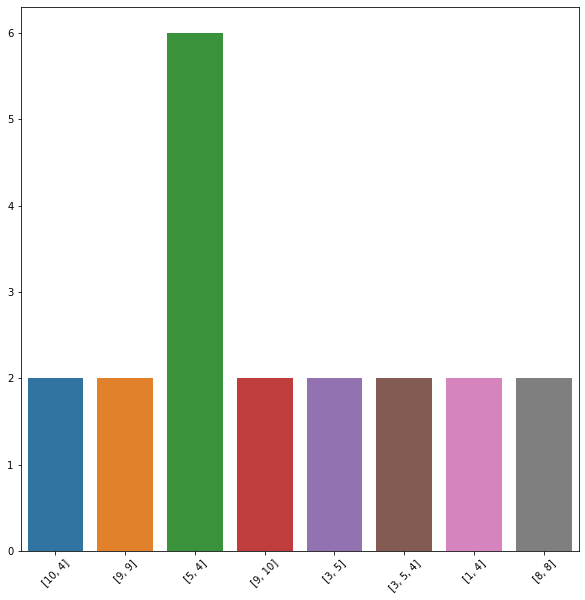

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
plt.xticks(rotation=45)
sns.barplot(x,y, ax = ax)